# Veriyi Yükleme

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir=r"C:Tensorflow_Trafik_isaretleri\data"

train_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

test_datagen=ImageDataGenerator(rescale=1./255,validation_split=0.1)

train_datagen=train_datagen.flow_from_directory(base_dir,target_size=(32,32),subset="training",batch_size=64,shuffle=True)

test_datagen=test_datagen.flow_from_directory(base_dir,target_size=(32,32),subset="validation",batch_size=64,shuffle=False)

# Görselleştirme

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
print(train_datagen.class_indices)
for _ in range(5):
    img, label = train_datagen.next()
    print(img.shape)   
    plt.imshow(img[0])
    print(label[0])   

    plt.show()

# Kütüphaneler

In [3]:
import tensorflow as tf
import numpy as np
import pylab as pl
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.core import Dense, Dropout, Activation, Flatten
from tensorflow.keras import layers,activations

# Model Oluşumu

In [4]:
model=Sequential()

model.add(layers.Conv2D(filters=32,activation="relu",kernel_size=(5,5),input_shape=(32,32,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64,activation="relu",kernel_size=(3,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64,activation="relu",kernel_size=(2,2)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(filters=64,activation="relu",kernel_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(500,activation="relu"))
model.add(layers.Dense(500,activation="relu"))
model.add(layers.Dense(43,activation="softmax"))

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          16448     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

# Model Eğitimi

In [6]:
optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
loss=tf.keras.losses.CategoricalCrossentropy()

In [7]:
model.compile(optimizer=optimizer,loss=loss,metrics=["accuracy"])

In [8]:
result=model.fit(train_datagen,epochs=10,verbose=1,validation_data=test_datagen)

Epoch 1/10
490/490 [==============================] - 67s 135ms/step - loss: 1.6162 - accuracy: 0.5253 - val_loss: 0.5459 - val_accuracy: 0.8433
Epoch 2/10
490/490 [==============================] - 51s 103ms/step - loss: 0.2896 - accuracy: 0.9125 - val_loss: 0.3393 - val_accuracy: 0.8968
Epoch 3/10
490/490 [==============================] - 52s 106ms/step - loss: 0.1419 - accuracy: 0.9568 - val_loss: 0.2859 - val_accuracy: 0.9132
Epoch 4/10
490/490 [==============================] - 51s 104ms/step - loss: 0.0940 - accuracy: 0.9728 - val_loss: 0.2449 - val_accuracy: 0.9284
Epoch 5/10
490/490 [==============================] - 52s 107ms/step - loss: 0.0631 - accuracy: 0.9815 - val_loss: 0.2797 - val_accuracy: 0.9181
Epoch 6/10
490/490 [==============================] - 49s 100ms/step - loss: 0.0581 - accuracy: 0.9827 - val_loss: 0.1872 - val_accuracy: 0.9483
Epoch 7/10
490/490 [==============================] - 53s 109ms/step - loss: 0.0520 - accuracy: 0.9836 - val_loss: 0.2555 - val_ac

In [9]:
result.history

{'loss': [1.616159200668335,
  0.28962966799736023,
  0.14192995429039001,
  0.0940202996134758,
  0.06311780214309692,
  0.05812409892678261,
  0.05197935551404953,
  0.04368045926094055,
  0.03325803577899933,
  0.04347045719623566],
 'accuracy': [0.5252873301506042,
  0.9124840497970581,
  0.9568007588386536,
  0.9728288650512695,
  0.9814814925193787,
  0.9826628565788269,
  0.9836207032203674,
  0.9863346219062805,
  0.9899744391441345,
  0.9865261912345886],
 'val_loss': [0.5458657145500183,
  0.33930686116218567,
  0.28593748807907104,
  0.24493543803691864,
  0.2797088027000427,
  0.1872406303882599,
  0.25550371408462524,
  0.17181453108787537,
  0.14931102097034454,
  0.17941652238368988],
 'val_accuracy': [0.8433457612991333,
  0.8968093991279602,
  0.9131934642791748,
  0.9284276962280273,
  0.9180799126625061,
  0.948261022567749,
  0.9298648834228516,
  0.9542971849441528,
  0.957459032535553,
  0.953722357749939]}

In [10]:
model.save("agirlik_udemy.h5")

# Model Testi

In [11]:
model.evaluate(test_datagen)

55/55 [==============================] - 4s 65ms/step - loss: 0.1794 - accuracy: 0.9537


[0.17941652238368988, 0.953722357749939]

# Görselleştirme

In [12]:
result.history

{'loss': [1.616159200668335,
  0.28962966799736023,
  0.14192995429039001,
  0.0940202996134758,
  0.06311780214309692,
  0.05812409892678261,
  0.05197935551404953,
  0.04368045926094055,
  0.03325803577899933,
  0.04347045719623566],
 'accuracy': [0.5252873301506042,
  0.9124840497970581,
  0.9568007588386536,
  0.9728288650512695,
  0.9814814925193787,
  0.9826628565788269,
  0.9836207032203674,
  0.9863346219062805,
  0.9899744391441345,
  0.9865261912345886],
 'val_loss': [0.5458657145500183,
  0.33930686116218567,
  0.28593748807907104,
  0.24493543803691864,
  0.2797088027000427,
  0.1872406303882599,
  0.25550371408462524,
  0.17181453108787537,
  0.14931102097034454,
  0.17941652238368988],
 'val_accuracy': [0.8433457612991333,
  0.8968093991279602,
  0.9131934642791748,
  0.9284276962280273,
  0.9180799126625061,
  0.948261022567749,
  0.9298648834228516,
  0.9542971849441528,
  0.957459032535553,
  0.953722357749939]}

In [13]:
acc=result.history["accuracy"]
val_acc=result.history["val_accuracy"]
acc_loss=result.history["loss"]
val_loss=result.history["val_loss"]

In [14]:
epoch=range(1,len(acc)+1)

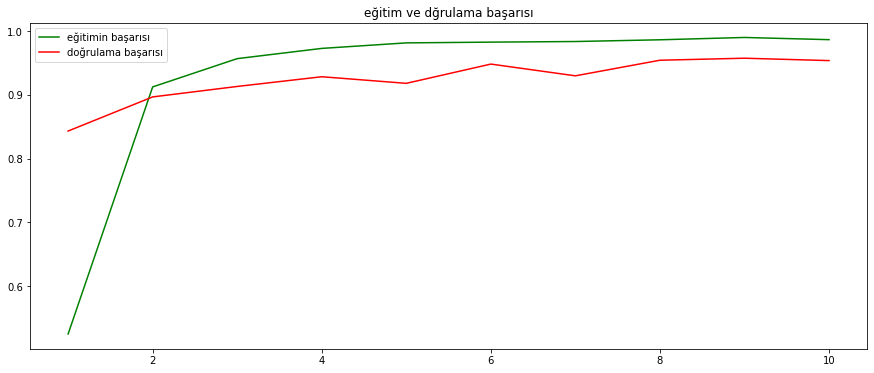

In [15]:
plt.figure(figsize=(15,6))
plt.plot(epoch,acc,label=("eğitimin başarısı"),color="g")
plt.plot(epoch,val_acc,label=("doğrulama başarısı"),color="r")
plt.title("eğitim ve dğrulama başarısı")
plt.legend()

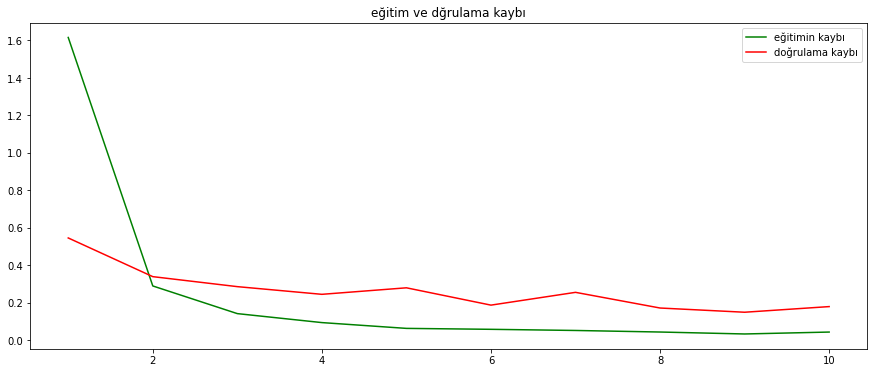

In [16]:
plt.figure(figsize=(15,6))
plt.plot(epoch,acc_loss,label=("eğitimin kaybı"),color="g")
plt.plot(epoch,val_loss,label=("doğrulama kaybı"),color="r")
plt.title("eğitim ve dğrulama kaybı")
plt.legend()

# Eğitilmiş Modeli Yükleme

In [17]:
from tensorflow.keras.models import load_model
model = load_model("agirlik.h5")

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          16448     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 64)         0

# Webcam 

In [ ]:
import numpy as np
import cv2
import pickle
from tensorflow import keras

 
frameWidth= 640     
frameHeight = 480
brightness = 180
threshold = 0.90        
font = cv2.FONT_HERSHEY_SIMPLEX

cap = cv2.VideoCapture(0)
cap.set(3, frameWidth)
cap.set(4, frameHeight)
cap.set(10, brightness)

model=keras.models.load_model("fatih1.h5",compile=False)
 
def preprocessing(img):
    img = img/255
    return img
def getCalssName(classNo):
    if classNo == 0: return "Hız Limit 20 km/h"
    elif classNo == 1: return 'Dur'
    elif classNo == 2: return 'Bir sonraki kavşakta yol hakkı'
    elif classNo == 3: return 'Hız Limit 30 km/h'
    elif classNo == 4: return '13_Yield'
    elif classNo == 5: return 'Dur'
    elif classNo == 6: return 'Araç yok'
    elif classNo == 7: return 'Dur'
    elif classNo == 8: return 'Giriş yok'
    elif classNo == 9: return 'Genel Dikkat'
    elif classNo == 10: return 'Soldaki Tehlikeli Eğri'
    elif classNo == 11: return 'Hız Limit 30 km/h'
    elif classNo == 12: return 'Sağdaki Tehlikeli Eğri'
    elif classNo == 13: return 'Çift Eğri'
    elif classNo == 14: return 'Engebeli yol'
    elif classNo == 15: return 'Kaygan '
    elif classNo == 16: return 'Yol Daralan Sagda'
    elif classNo == 17: return 'Yol çalışması'
    elif classNo == 18: return 'Trafik İşaretleri'
    elif classNo == 19: return 'yayalar'
    elif classNo == 20: return 'Cocuk Geçişi'
    elif classNo == 21: return 'Bisiklet Geçişi'
    elif classNo == 22: return 'Hız Limit 50 km/h'
    elif classNo == 23: return 'Buz Dikkat'
    elif classNo == 24: return 'Vahşi hayvanların geçişi'
    elif classNo == 25: return 'Tüm hız ve geçiş limitlerinin sonu'
    elif classNo == 26: return 'Saga Dön'
    elif classNo == 27: return 'Sola Dön'
    elif classNo == 28: return 'Sadece İleri'
    elif classNo == 29: return 'Düz veya saga git'
    elif classNo == 30: return 'Düz veya sola git'
    elif classNo == 31: return 'Sagdan Gidin'
    elif classNo == 32: return 'Soldan Gidin'
    elif classNo == 33: return 'Hız Limit 60 km/h'
    elif classNo == 34: return 'Cocuk Geçişi'
    elif classNo == 35: return '41_End_of_no_passing'
    elif classNo == 36: return 'Dur'
    elif classNo == 37: return 'Hız Limit 70 km/h'
    elif classNo == 38: return 'Hız Limit 80 km/h'
    elif classNo == 39: return 'Hız sınırı sonu 80 km/h'
    elif classNo == 40: return 'Hız Limit 100 km/h'
    elif classNo == 41: return 'Hız Limit 120 km/h'
    elif classNo == 42: return 'Geçiş yok'


 
while True:
    success, imgOrignal = cap.read()
    img = np.asarray(imgOrignal)
    img = cv2.resize(img, (32, 32))
    img = preprocessing(img)
    cv2.imshow("islenen Resim", img)
    img = img.reshape(1,32,32,3)
    cv2.putText(imgOrignal, "Sonuc: " , (20, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    cv2.putText(imgOrignal, "Olasilik: ", (20, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
    predictions = model.predict(img)
    classIndex = model.predict_classes(img)
    probabilityValue =np.amax(predictions)
    if probabilityValue > threshold:
        cv2.putText(imgOrignal,str(classIndex)+" "+str(getCalssName(classIndex)), (120, 35), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.putText(imgOrignal, str(round(probabilityValue*100,2) )+"%", (180, 75), font, 0.75, (0, 0, 255), 2, cv2.LINE_AA)
        cv2.imshow("sonuc", imgOrignal)
    if cv2.waitKey(1) and 0xFF == ord('q'):
        break

C:\Anaconda\envs\kubraa\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
